In [1]:
# set environment
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# display the column names and data types
# for the measurement table
meas_columns = inspector.get_columns('measurement')
for column in meas_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# display the column names and data types
# for the station table
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set
max_date = session.query(func.max(Measurement.date)).scalar()
max_date

'2017-08-23'

In [13]:
# calculate 1 year prior to max date 
date_split = max_date.split("-")
min_date = dt.date(int(date_split[0]), int(date_split[1]), int(date_split[2])) - dt.timedelta(days=365)
min_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
# for the last 12 months of reporting
results = session.query(Measurement.date, Measurement.prcp).\
                 filter(Measurement.date > min_date).all()

for row in results:
    print(row)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

('2017-08-09', 0.15)
('2017-08-10', 0.07)
('2017-08-11', None)
('2017-08-12', 0.14)
('2017-08-13', None)
('2017-08-14', 0.22)
('2017-08-15', 0.42)
('2017-08-16', 0.42)
('2017-08-17', 0.13)
('2017-08-18', None)
('2017-08-19', 0.09)
('2017-08-20', None)
('2017-08-21', 0.56)
('2017-08-22', 0.5)
('2017-08-23', 0.45)


In [15]:
# create a dataframe containing date and precipitation score
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# drop rows with null data and set index on date
clean_df = df.dropna(how="any")
clean_df.set_index('date', inplace=True)

In [17]:
# sort the dataframe by date
sorted_df = clean_df.sort_values(by="date")
sorted_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


In [19]:
# pull date data for plot
dates = sorted_df.index.to_list()

# cast to set to remove duplicates
unq_dates = set(dates)

# cast back to list for plotting
unq_date_list = list(unq_dates)

In [20]:
# sort date list
unq_date_list.sort()
unq_date_list

['2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-28',
 '2016-10-

In [21]:
# pull precipitation data for plotting
precip = sorted_df["precipitation"].to_list()

In [22]:
# pare down dates for y labelling
labels = unq_date_list[::30]
labels.append(dates[-1])
labels

['2016-08-24',
 '2016-09-23',
 '2016-10-23',
 '2016-11-22',
 '2016-12-22',
 '2017-01-21',
 '2017-02-20',
 '2017-03-22',
 '2017-04-21',
 '2017-05-21',
 '2017-06-20',
 '2017-07-20',
 '2017-08-19',
 '2017-08-23']

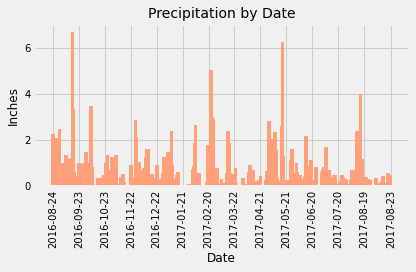

In [24]:
# create a bar chart showing inches of precipitation by date
fig, prec = plt.subplots()
    
prec.bar(dates, precip, color="lightsalmon", width=4.0)

# force the location of the xticks -- a year's worth of ticks are too many to read on the x axis.
x_formatter = FixedFormatter(labels)
x_locator = FixedLocator([0, 28, 56, 84, 112, 140, 168, 196, 224, 252, 280, 308, 336, 365])

prec.xaxis.set_major_formatter(x_formatter)
prec.xaxis.set_major_locator(x_locator)

# set title and axis labels
plt.title("Precipitation by Date", fontsize=14)
plt.ylabel("Inches", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# save chart to a PNG
plt.tight_layout()
plt.savefig("output/precipitation_bar.png")

plt.show()

In [174]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [175]:
# Calculate the total number stations in the dataset
results = session.query(Measurement.station).distinct().count()
print(results)

9


In [26]:
# Find the most active stations
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc())

for row in results:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [27]:
# pull only the most active station 
results = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).first()

busy_station = results.station
print(busy_station)

USC00519281


In [28]:
# calculation the lowest temperature, the highest temperature and the average temperature
# for the most active station
results = session.query(Measurement.station,\
                        func.min(Measurement.tobs),\
                        func.max(Measurement.tobs),\
                        func.avg(Measurement.tobs)).\
        filter(Measurement.station == busy_station).all()

min_temp = results[0][1]
max_temp = results[0][2]
avg_temp = results[0][3]

print(f"Most active station: {busy_station}\nLowest Temperature: {min_temp}")
print(f"Highest Temperature: {max_temp}\nAverage Temperature: {avg_temp}")

Most active station: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).\
                filter(Measurement.station == busy_station).\
                filter(Measurement.date > min_date)

for row in results:
    print(row)

(77.0,)
(80.0,)
(80.0,)
(75.0,)
(73.0,)
(78.0,)
(77.0,)
(78.0,)
(80.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(73.0,)
(74.0,)
(80.0,)
(79.0,)
(77.0,)
(80.0,)
(76.0,)
(79.0,)
(75.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(76.0,)
(74.0,)
(77.0,)
(78.0,)
(79.0,)
(79.0,)
(77.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(79.0,)
(79.0,)
(79.0,)
(79.0,)
(75.0,)
(76.0,)
(73.0,)
(72.0,)
(71.0,)
(77.0,)
(79.0,)
(78.0,)
(79.0,)
(77.0,)
(79.0,)
(77.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(74.0,)
(75.0,)
(76.0,)
(73.0,)
(76.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(74.0,)
(75.0,)
(75.0,)
(75.0,)
(75.0,)
(71.0,)
(63.0,)
(70.0,)
(68.0,)
(67.0,)
(77.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(76.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(75.0,)
(74.0,)
(75.0,)
(74.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(73.0,)
(74.0,)
(70.0,)
(72.0,)
(70.0,)
(67.0,)
(67.0,)
(69.0,)
(70.0,)
(68.0,)
(69.0,)
(69.0,)
(66.0,)
(65.0,)
(68.0,)
(62.0,)
(75.0,)
(70.0,)
(69.0,)
(76.0,)
(76.0,)
(74.0,)
(73.0,)
(71.0,)
(74.0,)
(74.0,)
(72.0,)


In [30]:
# create a dataframe
tobs_df = pd.DataFrame(results, columns=['tobs'])
tobs_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


In [31]:
# pull the temperatures from the table
temps = tobs_df["tobs"]

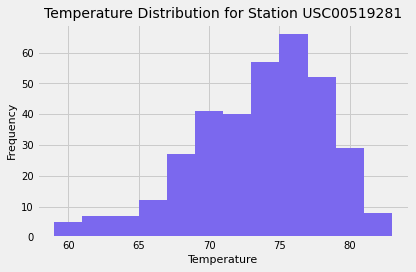

In [32]:
# plot and display the histogram
plt.hist(temps, bins=12, color="mediumslateblue")

# set the title and axis labels
plt.title(f"Temperature Distribution for Station {busy_station}", fontsize=14)
plt.xlabel("Temperature", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# save an image of the chart and display
plt.tight_layout()
plt.savefig("output/temperature_histogram.png")
plt.show()

# Close session

In [33]:
# Close Session
session.close()